# Assignment-1

Due on September, 27.


This exercise will require you to pull some data from the `yahoo finance`. Yahoo finance is currently the one of most widely used API of financial market data.

Yahoo finance has a large number of data sources, but, you restrict your attention to the extraction of the stock price.

For this assignment, we will focus on Apple and Microsoft stock prices data from the S&P-500, a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. You'll analyze these stock prices. These company are listed under the stock ticker `aapl` and `msft`.

These are your tasks for this mini project:

1. Collect daily closing price stock price of Apple and Microsoft covering the period of 2020-01-01 - 2021-01-01 (keep in mind that the date format is YYYY-MM-DD). (15 pts)
2. Draw the line plot for the stock prices and interpret the stock price movement, if there is any. (15 pts)
3. Calculate stock return of Apple and Microsoft in this period. (15 pts)
4. What is the largest return of these companies during this period? (15 pts)
5. Draw the histogram of the returns and interpret the distributions you obtained. (15 pts)
6. Use QQ plot and see if the stock returns follow normal distribution. (15 pts)
7. Calculate the correlation coefficient between these stock returns and interpret. (10 pts)



In [ ]:
#first use pip to install package
!pip3 install yfinance

#now import package
import yfinance as yf

#other stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


##### 1. Collect daily closing price stock price of Apple and Microsoft covering the period of 2020-01-01 - 2021-01-01 (keep in mind that the date format is YYYY-MM-DD).

In [ ]:
#aapl and msft
#2020-01-01 - 2021-01-01 YYYY-MM_DD
stocks = ['AAPL', 'MSFT'] 
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 1, 1)
port = yf.download(stocks, start=start, end=end, interval='1d')

[*********************100%***********************]  2 of 2 completed


In [ ]:
port.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT')],
           )

##### 2. Draw the line plot for the stock prices and interpret the stock price movement, if there is any. 

In [ ]:
#line plot of closing prices
port_close = port['Close']
#port_close.head()


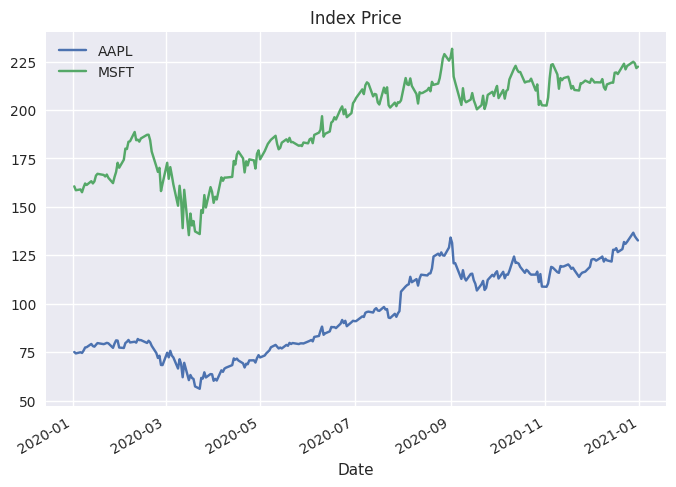

In [ ]:
port_close.plot()
plt.xlabel('Date')
plt.title('Index Price')
plt.show()

##### Interpretation: Over the course of 2020 to 2021, both stock prices increased steadily. The increases and decreases actually mimic each other, with the base price of MSFT always higher. 

##### 3. Calculate stock return of Apple and Microsoft in this period.

In [ ]:
#Using percent change
port_close.pct_change()

,AAPL,MSFT
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.009722,-0.012452
2020-01-06,0.007968,0.002585
2020-01-07,-0.004703,-0.009118
2020-01-08,0.016086,0.015928
...,...,...
2020-12-24,0.007712,0.007827
2020-12-28,0.035766,0.009921
2020-12-29,-0.013315,-0.003601


##### 4. What is the largest return of these companies during this period?

In [ ]:
returns = port_close.pct_change()
returns.max()

AAPL    0.119808
MSFT    0.142169
dtype: float64

##### During this year, Apple's biggest return was 12%, while Microsoft's was 14%.

##### 5. Draw the histogram of the returns and interpret the distributions you obtained.

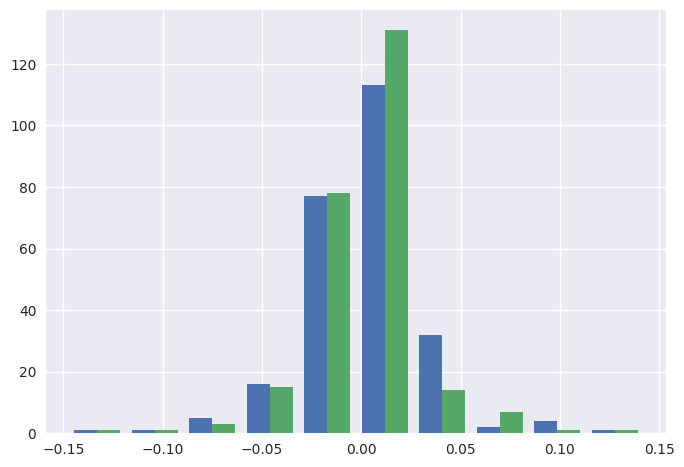

In [ ]:
plt.hist(returns)
plt.show()
#Green is MSFT, blue is AAPL

<AxesSubplot:xlabel='Date'>

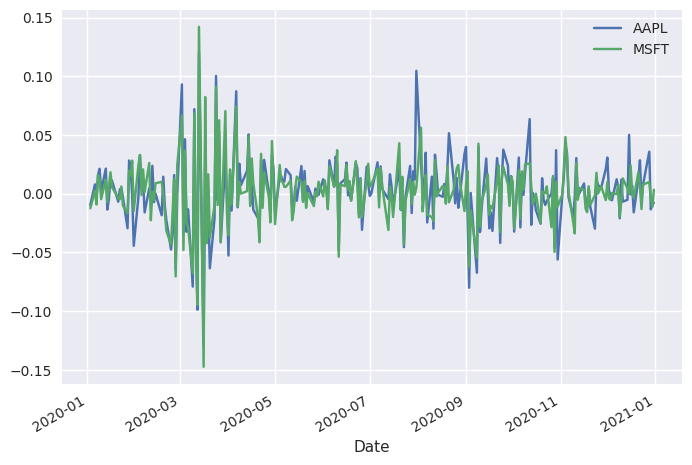

In [ ]:
#Line graph
returns.plot()

##### The graphs show the returns for both stocks follow a nearly normal distribution. 

##### 6. Use QQ plot and see if the stock returns follow normal distribution.

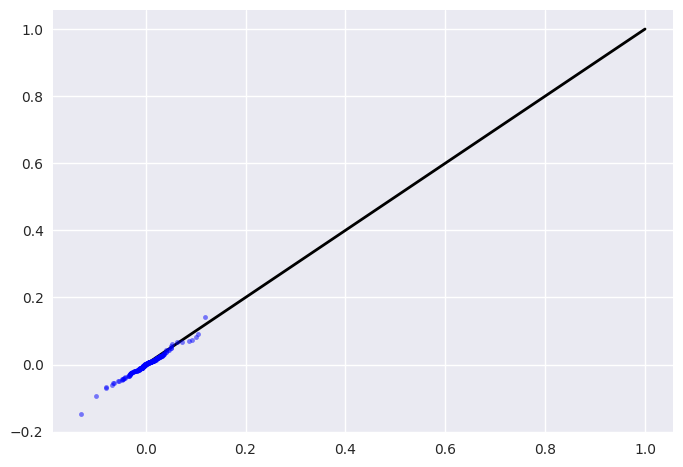

In [ ]:
aapl = returns['AAPL']
msft = returns['MSFT']

n = 1000
plt.plot([0, 1], [0, 1], color = 'black', linewidth = 2)
plt.plot(sorted(aapl), sorted(msft), '.', color = 'blue', alpha=0.5);

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


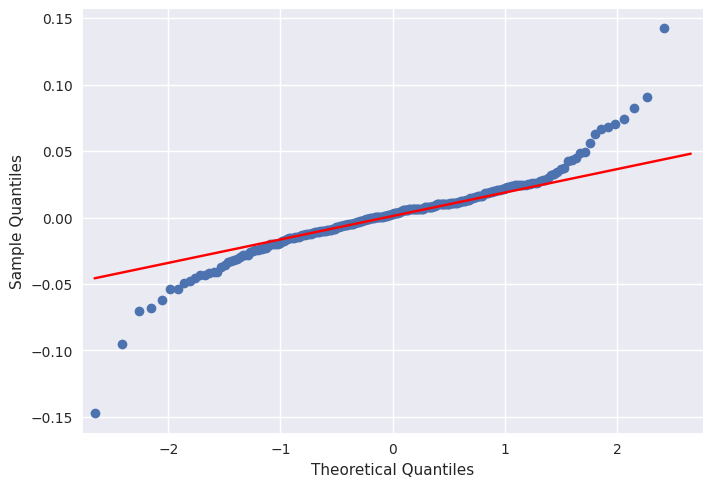

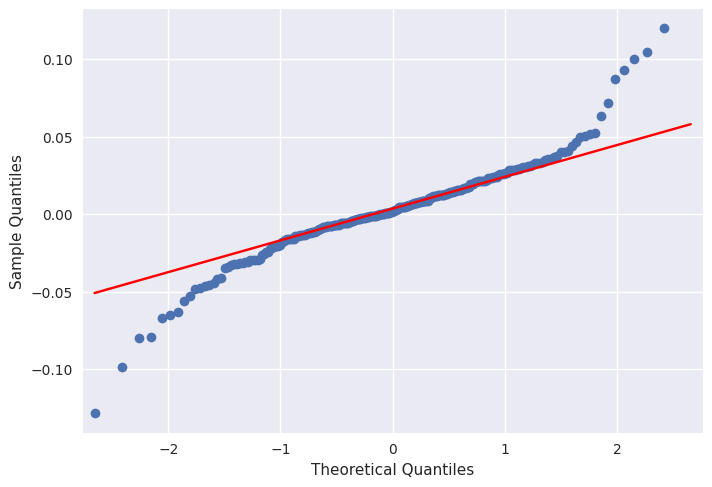

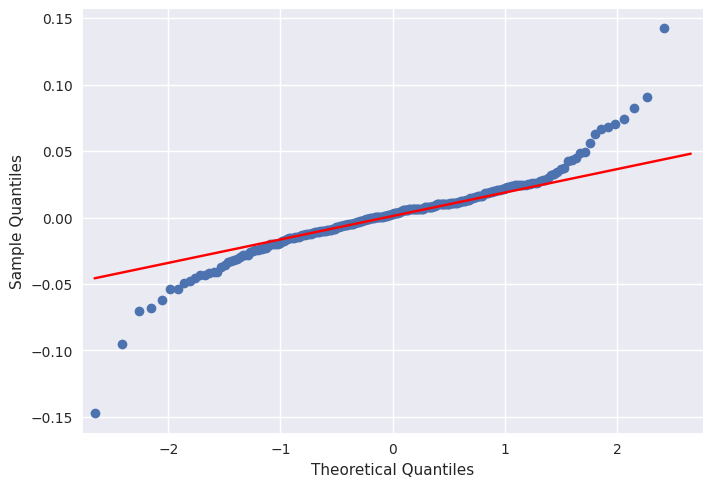

In [ ]:
!pip3 install statsmodels
from statsmodels.graphics.gofplots import qqplot

qqplot(aapl, line='q')

qqplot(msft, line='q')

##### Yes, they follow the normal distribution. 

##### Calculate the correlation coefficient between these stock returns and interpret. 

In [ ]:
returns.corr()

,AAPL,MSFT
AAPL,1.000000,0.838892
MSFT,0.838892,1.000000


##### There is a strong relationship between the two stock prices. AAPL and MSFT are highly positively related. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=310a33be-f512-48c8-8707-dc5137fbcc75' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>